<a href="https://colab.research.google.com/github/dhawalnegi1/EVA/blob/master/Project-4/FIRST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vanilla network

With the archicture of 8,16,32 maxpool and 1x1

Installing the keras library if not already installed and then importing it.

In [0]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


Importing the numpy library to be used later, and importing the models and differnt functions of keras library , and the mnist dataset.

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Convolution2D
from keras.utils import np_utils

from keras.datasets import mnist

This cell is for loading the training as well as testing dataset in the specific lists. The dataset is download from and amazon storage bucket and is loaded in the defined variables.

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


The shape (no. of images and size of the image) of the training dataset is printed. We import pyplot package from matplotlib library to plot the image in the notebook. the next line is a magic function ."%" is inline magic function used to plot in the notebook instead of creating new window. we are showing the first image fron the 60000 in thetraining dataset.

(60000, 28, 28)


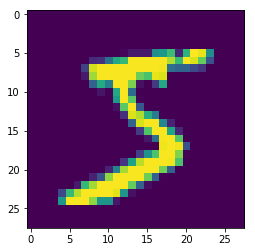

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In this cell, the test as well as training dataset's shape is modified using reshape function because the dataset loaded was 2 dimensional vector and for convolution we require 3-d vector(i.e height x width of image plus no of channels). In reshape function we are defining no. of input channel as 1.

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In this cell, we change the datatype of the dataset to float and then the pixel value of each image in training and testing datasets are normalized(i.e. between 0 & 1).

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In this cell, we are printing the classes of 1st 10 images of training dataset,

In [0]:
y_train[:10]


array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In, the cell we are coverting the y_train and y_test data into categorical data(i.e for each image there is array of 10 values representing either 0 or 1, telling image belong to which class). Only 1 out of 10 values can be 1. We using numpy to perform this action.

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In this cell, we are printing the categorical value of 1st 10 images of training dataset.

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

This is the cell where are model and its layers are defined. We are defining sequential model.
Initial input to the model is (28x28)x1.

In [0]:
from keras.layers import Activation, MaxPooling2D

model = Sequential() 
model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1))) # input=(28x28)      receptive field = 3x3
model.add(Convolution2D(16, 3, 3, activation='relu'))                        # input=(26x26)     receptive field = 5x5
model.add(Convolution2D(32, 3, 3, activation='relu'))                       # input=(24x24)     receptive field = 7x7

model.add(MaxPooling2D(pool_size=(2, 2)))                                    # input=(22x22)    receptive field = 14x14
model.add(Convolution2D(8,1))
model.add(Convolution2D(8, 3, 3, activation='relu'))                       # input=(11x11)    receptive field = 16x16
model.add(Convolution2D(16, 3, 3, activation='relu'))                       # input=(9x9)    receptive field = 18x18
model.add(Convolution2D(32, 3, 3, activation='relu'))                      # input=(7x7)    receptive field = 20x20
model.add(Convolution2D(64, 3, 3, activation='relu'))                      # input=(5x5)     receptive field = 22x22
model.add(Convolution2D(128, 3, 3, activation='relu'))                        # input=(3x3)     receptive field = 24x24
model.add(Convolution2D(10,1))
model.add(Flatten())                                                         # input=(1x1)
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 16)        1168      
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 22, 22, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 8)         264       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 9, 9, 8)           584       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 7, 7, 16)          1168      
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path

Here we compile our model and configure its learning process . we pass 3 arguments,i.e. optimizer, loss function and metrics.

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In this cell, we train our model on training dataset , by dividing it into batches of size 32 each. The model is trained 10 times on dataset. i.e. it will go over all images 10 times(epochs).

In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 14s 239us/step - loss: 0.2018 - acc: 0.9356
Epoch 2/10
60000/60000 [==============================] - 14s 226us/step - loss: 0.0700 - acc: 0.9786
Epoch 3/10
60000/60000 [==============================] - 13s 223us/step - loss: 0.0512 - acc: 0.9847
Epoch 4/10
60000/60000 [==============================] - 14s 235us/step - loss: 0.0424 - acc: 0.9866
Epoch 5/10
60000/60000 [==============================] - 15s 252us/step - loss: 0.0353 - acc: 0.9891
Epoch 6/10
60000/60000 [==============================] - 13s 222us/step - loss: 0.0304 - acc: 0.9906
Epoch 7/10
60000/60000 [==============================] - 13s 221us/step - loss: 0.0268 - acc: 0.9917
Epoch 8/10
60000/60000 [==============================] - 13s 223us/step - loss: 0.0238 - acc: 0.9923
Epoch 9/10
60000/60000 [==============================] - 13s 221us/step - loss: 0.0209 - acc: 0.9934
Epoch 10/10
60000/60000 [==============================] - 14s 236us/step - loss: 

In this cell we evaluate our trained model whose output will be accuracy and loss on the test dataset.

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

Print the score calculated in previous cell

In [0]:
print(score)

[0.049624722852755807, 0.9844]


Here we are creating a new list y_pred and initilizing it with prediction values of each test image by our model in categorical form.

In [0]:
y_pred = model.predict(X_test)

printing the prediction and actual class of first 10 test images

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[7.4385142e-09 7.4385142e-09 7.4385142e-09 2.7306070e-08 7.4385142e-09
  7.4385142e-09 7.4385142e-09 1.0000000e+00 7.4385142e-09 7.4385142e-09]
 [1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01
  1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01]
 [1.7582924e-10 1.0000000e+00 1.7582924e-10 1.7582924e-10 4.0231694e-09
  2.7771122e-08 1.7582924e-10 1.7582924e-10 1.7006643e-08 1.7582924e-10]
 [9.9988544e-01 3.3127806e-06 3.3127806e-06 3.3127806e-06 3.3127806e-06
  3.3127806e-06 3.4904901e-05 3.3127806e-06 3.3127806e-06 5.6458619e-05]
 [5.4974487e-16 5.4974487e-16 5.4974487e-16 5.4974487e-16 1.0000000e+00
  5.4974487e-16 5.4974487e-16 5.4974487e-16 5.4974487e-16 1.4630346e-14]
 [4.2845411e-11 1.0000000e+00 4.2845411e-11 4.2845411e-11 1.2904374e-09
  1.4441652e-10 4.2845411e-11 3.3648692e-10 2.0322235e-09 4.2845411e-11]
 [2.1726034e-09 2.1726034e-09 2.1726034e-09 2.1726034e-09 9.9999845e-01
  2.1726034e-09 2.1726034e-09 4.4250834e-09 1.5111204e-06 

The network is good as its training and the same architecture can be continued. this can furthur be improved by using batch normalisation and large size convolution towards the end and validation test can be added with each epoch.